## Load results

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyabc

h = pyabc.History("sqlite:///tumor2d_stoch_acc_v4_uvar.db")

limits = dict(log_division_rate=(-3, -1),
              log_division_depth=(1, 3),
              log_initial_spheroid_radius=(0, 1.2),
              log_initial_quiescent_cell_fraction=(-5, 0),
              log_ecm_production_rate=(-5, 0),
              log_ecm_degradation_rate=(-5, 0),
              log_ecm_division_threshold=(-5, 0),
              std_growth_curve=(10, 100),
              std_extra_cellular_matrix_profile=(0.05, 0.5),
              std_proliferation_profile=(0.01, 0.03))

refval = dict(log_division_rate=4.17e-2,
              log_initial_spheroid_radius=1.2e1,
              log_initial_quiescent_cell_fraction=7.5e-1,
              log_division_depth=100,
              log_ecm_production_rate=5e-3,
              log_ecm_degradation_rate=8e-4,
              log_ecm_division_threshold=1e-2,
              std_growth_curve=40,
              std_extra_cellular_matrix_profile=0.15,
              std_proliferation_profile=0.02)
for key, val in refval.items():
    if not key.startswith('std_'):
        refval[key] = np.log10(val)
    
print(h.max_t)

8


## Plot data

dict_keys(['growth_curve', 'extra_cellular_matrix_profile', 'proliferation_profile'])


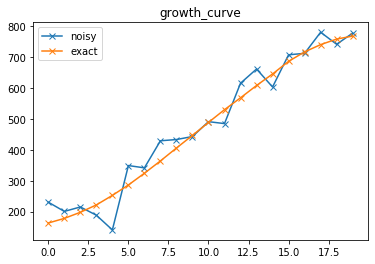

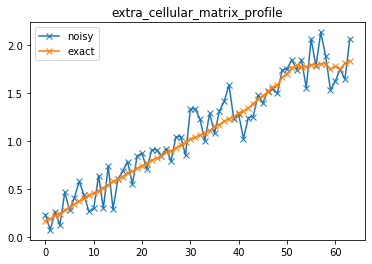

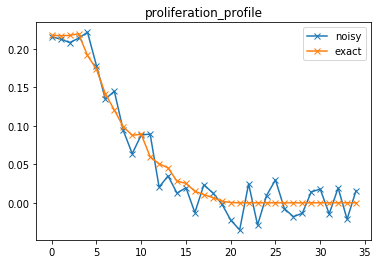

In [3]:
import pickle
import matplotlib.pyplot as plt

exact_data = pickle.load(open('exact_data_v4.dat', 'rb'))
noisy_data = pickle.load(open('noisy_data_v4.dat', 'rb'))

print(exact_data.keys())

for key in exact_data.keys():
    plt.subplots()
    plt.plot(noisy_data[key], 'x-', label='noisy')
    plt.plot(exact_data[key], 'x-', label='exact')
    plt.title(key)
    plt.legend()

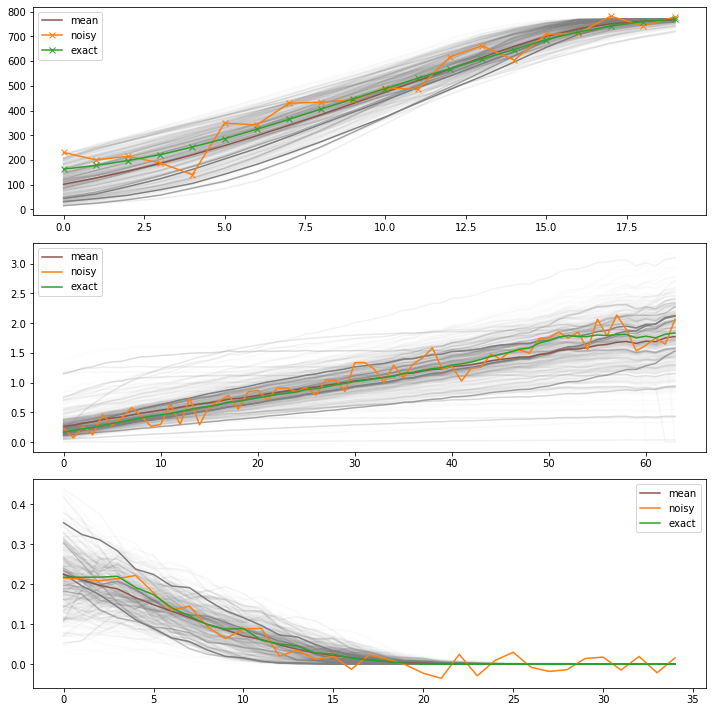

In [4]:
def plot_sum_stats(h, title):
    fig, arr_ax = plt.subplots(3, 1)

    def f_plot(sum_stat, weight, arr_ax, **kwargs):
        for i, key in enumerate(sum_stat.keys()):
            arr_ax[i].plot(sum_stat[key], '-', color='grey', alpha=min(20*weight, 1))
        
    def f_plot_mean(sum_stats, weights, arr_ax, **kwargs):
        aggregated = {}
        for key in sum_stats[0].keys():
            aggregated[key] = (np.array([sum_stat[key] for sum_stat in sum_stats]) \
                               * np.array(weights).reshape((-1,1))).sum(axis=0)
        for i, key in enumerate(aggregated.keys()):
            arr_ax[i].plot(aggregated[key], '-', color='C5', alpha=1, label='mean')

    pyabc.visualization.plot_data_callback(h, f_plot, f_plot_mean, ax=arr_ax)

    arr_ax[0].plot(noisy_data['growth_curve'], 'x-', color='C1', label='noisy')
    arr_ax[0].plot(exact_data['growth_curve'], 'x-', color='C2', label='exact')

    arr_ax[1].plot(noisy_data['extra_cellular_matrix_profile'], '-', color='C1', label='noisy')
    arr_ax[1].plot(exact_data['extra_cellular_matrix_profile'], '-', color='C2', label='exact')

    arr_ax[2].plot(noisy_data['proliferation_profile'], '-', color='C1', label='noisy')
    arr_ax[2].plot(exact_data['proliferation_profile'], '-', color='C2', label='exact')

    for ax in arr_ax: ax.legend()

    fig.set_size_inches((10, 10))
    fig.tight_layout()
    
plot_sum_stats(h, "Stochastic acceptor")

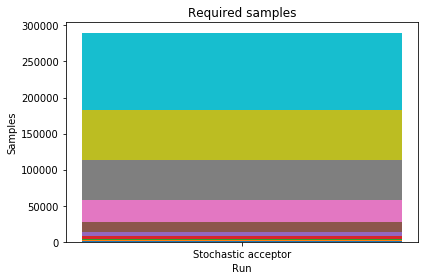

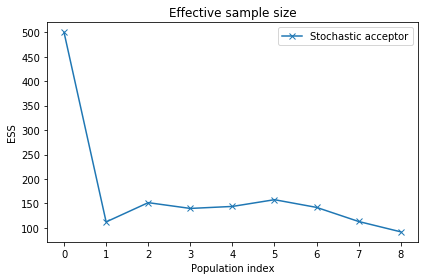

In [5]:
histories = [h]
labels = ["Stochastic acceptor"]

pyabc.visualization.plot_sample_numbers(histories, labels)
pyabc.visualization.plot_effective_sample_sizes(histories, labels)

plt.show()

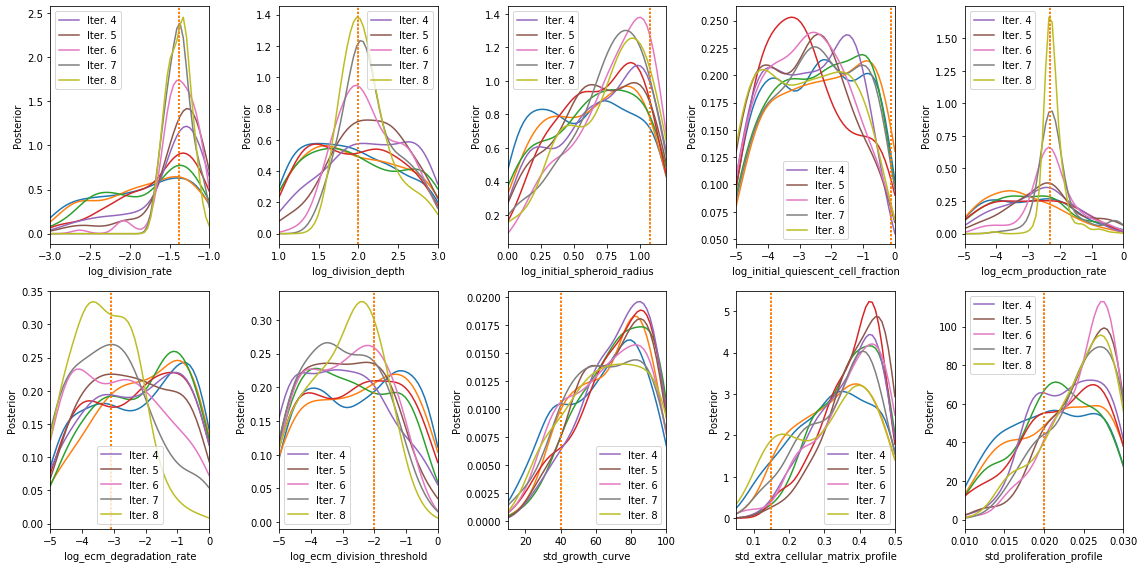

In [7]:
def plot_all(h):
    fig = plt.figure()
    for ip, p in enumerate(limits):
        ax = fig.add_subplot(2, 5, ip+1)
        for t in range(h.max_t + 1):
            pyabc.visualization.plot_kde_1d_highlevel(h, t=t, x=p, xmin=limits[p][0], xmax=limits[p][1],
                                                      ax=ax, refval=refval,
                                                      label=(f"Iter. {t}" if t > h.max_t - 5 else ""))
        ax.legend()

    fig.set_size_inches((16, 8))
    fig.tight_layout()

plot_all(h)

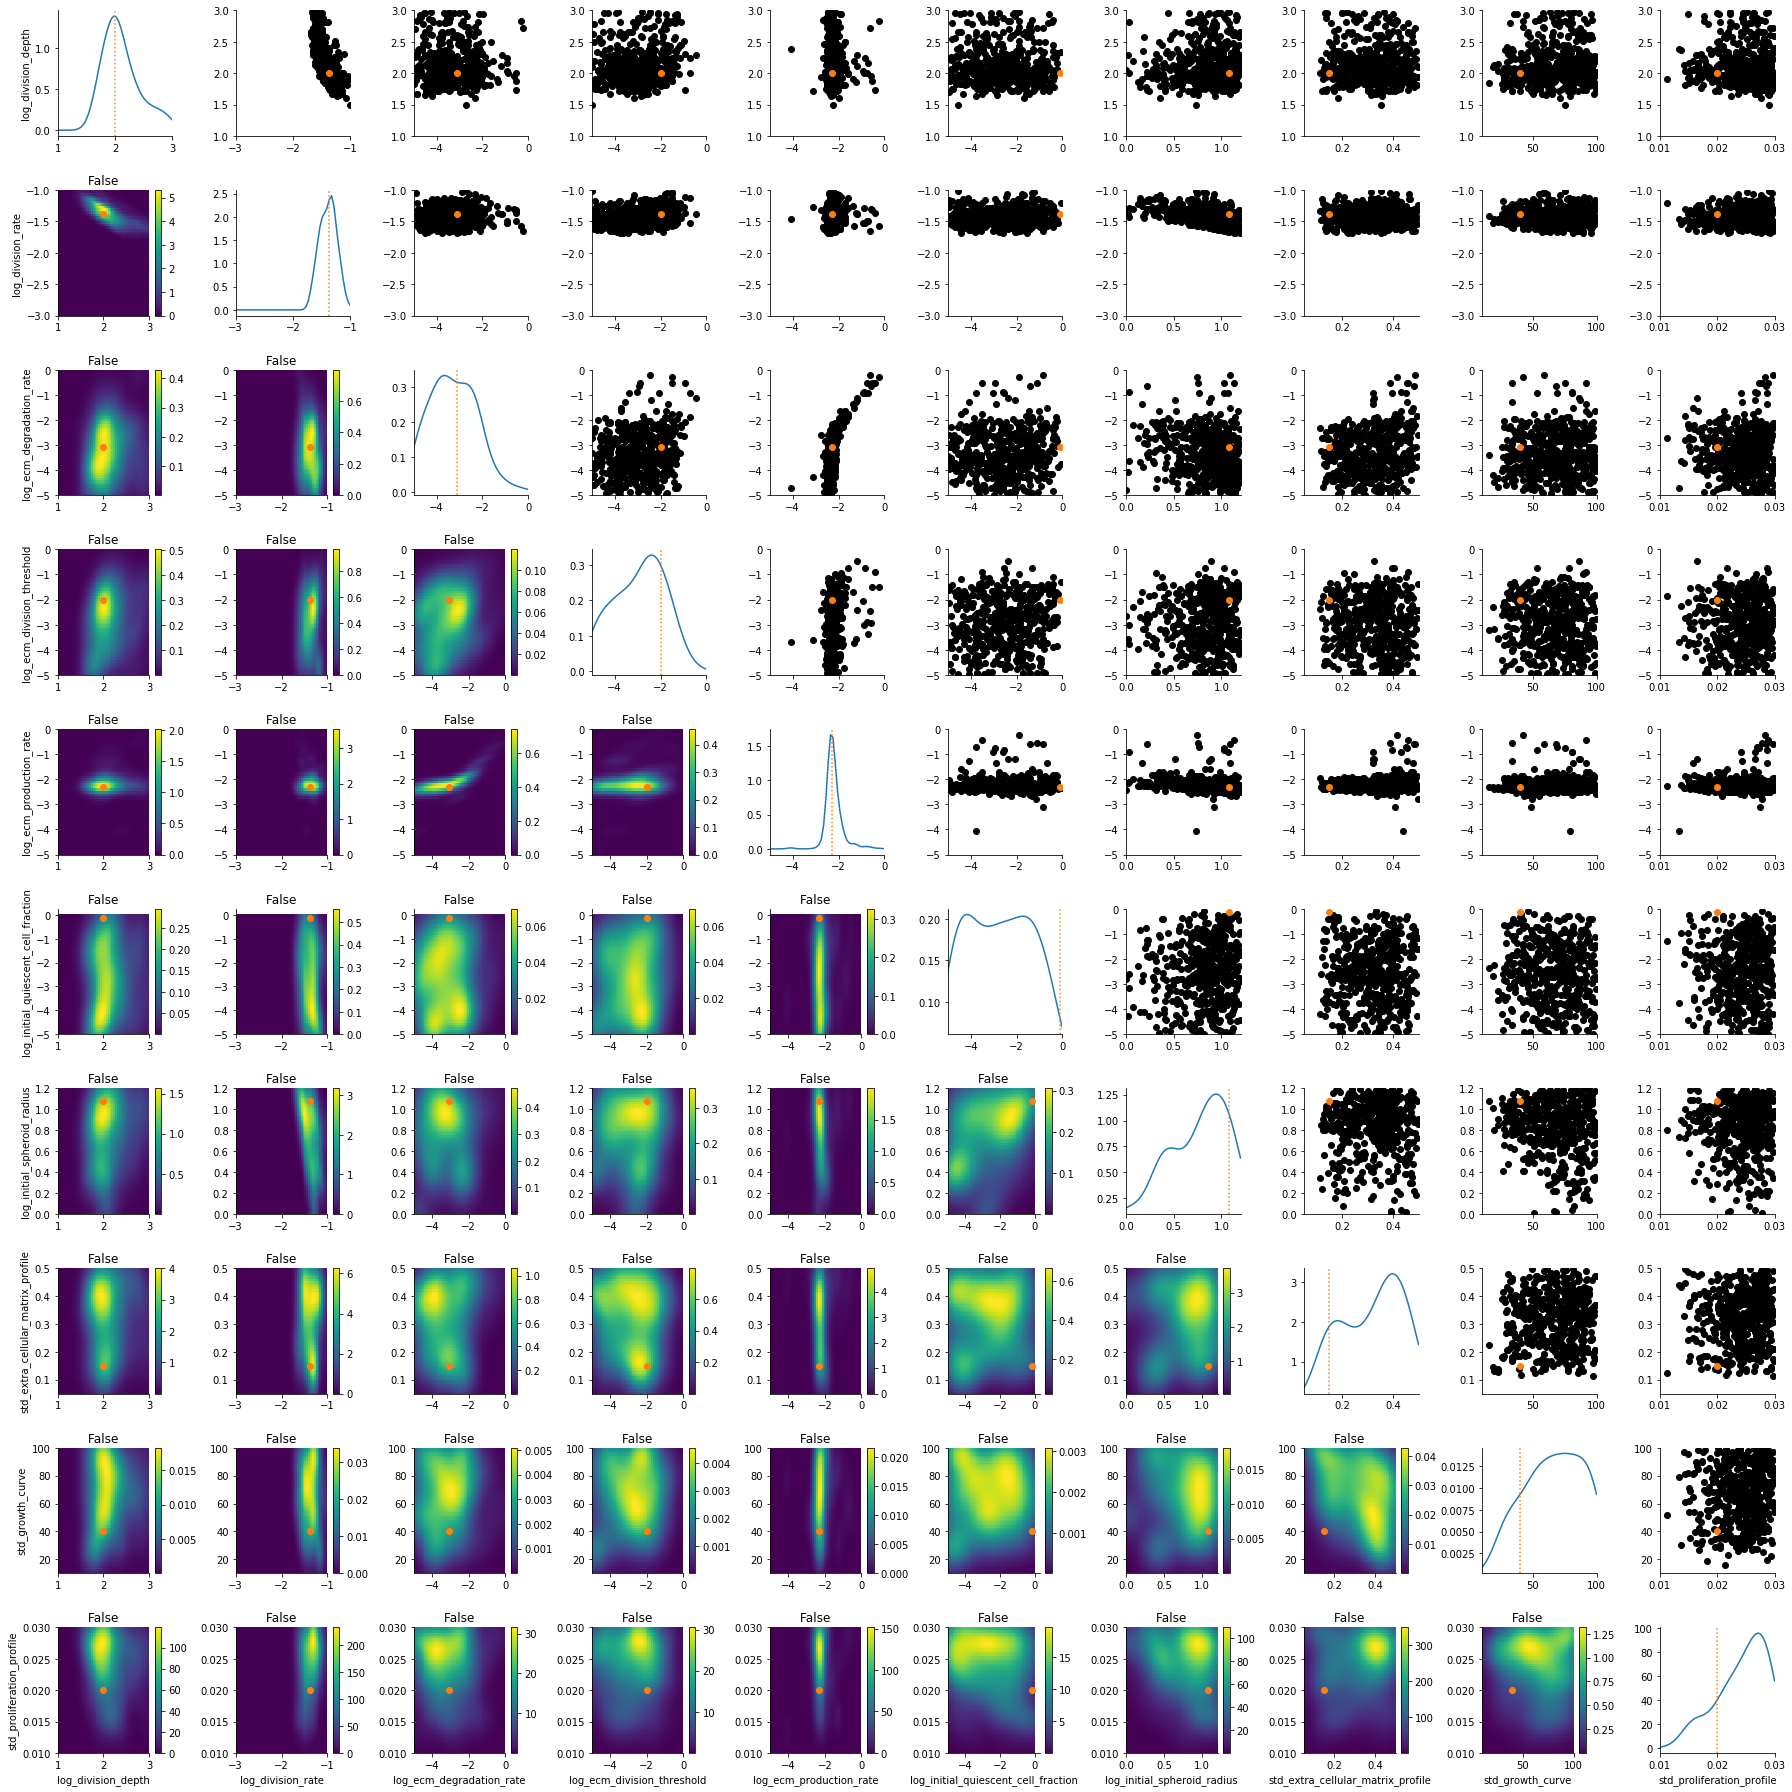

In [8]:
for _h in [h]:
    pyabc.visualization.plot_kde_matrix_highlevel(_h, refval=refval, limits=limits)
plt.show()